In [1]:
import re
import urllib.request
import zipfile
from lxml import etree
from nltk.tokenize import word_tokenize, sent_tokenize

In [2]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/09.%20Word%20Embedding/dataset/ted_en-20160408.xml", filename="ted_en-20160408.xml")

('ted_en-20160408.xml', <http.client.HTTPMessage at 0x1b3fffaf070>)

In [4]:
targetXML = open('ted_en-20160408.xml','r',encoding='UTF8')
target_text = etree.parse(targetXML)

parse_text = '\n'.join(target_text.xpath('//content/text()'))

content_text = re.sub(r'\([^)]*\)','',parse_text)
sent_text = sent_tokenize(content_text)
normalized_text = []
for string in sent_text:
    tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
    normalized_text.append(tokens)

result = [word_tokenize(sentence) for sentence in normalized_text]

In [6]:
print('총 샘플의 개수 : {}'.format(len(result)))

총 샘플의 개수 : 273424


In [7]:
for line in result[:3]:
    print(line)

['here', 'are', 'two', 'reasons', 'companies', 'fail', 'they', 'only', 'do', 'more', 'of', 'the', 'same', 'or', 'they', 'only', 'do', 'what', 's', 'new']
['to', 'me', 'the', 'real', 'real', 'solution', 'to', 'quality', 'growth', 'is', 'figuring', 'out', 'the', 'balance', 'between', 'two', 'activities', 'exploration', 'and', 'exploitation']
['both', 'are', 'necessary', 'but', 'it', 'can', 'be', 'too', 'much', 'of', 'a', 'good', 'thing']


# Word2Vec에서 size > vector_size로 변경해야 코딩가능

In [11]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

model = Word2Vec(sentences=result, vector_size=100, window=5, min_count=5, workers=4, sg=0)

In [12]:
model_result = model.wv.most_similar('man')
print(model_result)

[('woman', 0.8351784944534302), ('guy', 0.8005688190460205), ('boy', 0.7717055678367615), ('lady', 0.7516094446182251), ('girl', 0.7322050929069519), ('gentleman', 0.713657796382904), ('kid', 0.7063578963279724), ('poet', 0.6990970373153687), ('soldier', 0.6904993653297424), ('surgeon', 0.6493844985961914)]


In [13]:
model.wv.save_word2vec_format('eng_w2v')
loaded_model = KeyedVectors.load_word2vec_format('eng_w2v')

In [14]:
model_result = loaded_model.most_similar('man')
print(model_result)

[('woman', 0.8351784944534302), ('guy', 0.8005688190460205), ('boy', 0.7717055678367615), ('lady', 0.7516094446182251), ('girl', 0.7322050929069519), ('gentleman', 0.713657796382904), ('kid', 0.7063578963279724), ('poet', 0.6990970373153687), ('soldier', 0.6904993653297424), ('surgeon', 0.6493844985961914)]


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [16]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x1b3cc0059d0>)

In [17]:
train_data = pd.read_table('ratings.txt')

In [18]:
train_data[:5]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [19]:
print(len(train_data))

200000


In [20]:
print(train_data.isnull().values.any())

True


In [21]:
train_data = train_data.dropna(how='any')
print(train_data.isnull().values.any())

False


In [22]:
print(len(train_data))

199992


In [24]:
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

<ipython-input-24-6948268dad63>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


In [25]:
train_data[:5]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1


In [27]:
from tqdm.notebook import tqdm


stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

okt = Okt()

tokenized_data = []
for sentence in tqdm(train_data['document']):
    tokenized_sentence = okt.morphs(sentence,stem=True)
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords]
    tokenized_data.append(stopwords_removed_sentence)

리뷰의 최대 길이 :  72
리뷰의 평균 길이 : 10.716703668146726


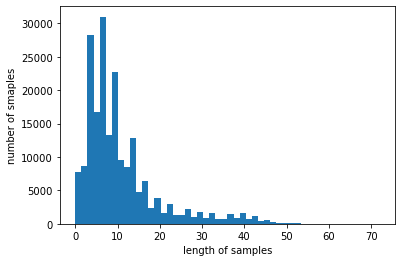

In [28]:
print('리뷰의 최대 길이 : ',max(len(review) for review in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len,tokenized_data))/len(tokenized_data))
plt.hist([len(review) for review in tokenized_data],bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of smaples')
plt.show()

In [30]:
from gensim.models import Word2Vec
model = Word2Vec(sentences = tokenized_data,vector_size=100,window=5,min_count = 5, workers =4 , sg = 0)

In [31]:
model.wv.vectors.shape

(16477, 100)

In [32]:
print(model.wv.most_similar("최민식"))

[('한석규', 0.8812515735626221), ('안성기', 0.8713764548301697), ('이민호', 0.8486290574073792), ('설경구', 0.8477638363838196), ('최민수', 0.842989981174469), ('윤제문', 0.8429120779037476), ('김명민', 0.8387751579284668), ('김수현', 0.8271292448043823), ('엄정화', 0.8247740268707275), ('서영희', 0.8238361477851868)]


In [33]:
print(model.wv.most_similar("히어로"))

[('슬래셔', 0.8723905682563782), ('무협', 0.8558839559555054), ('느와르', 0.8516100645065308), ('호러', 0.8507348895072937), ('블록버스터', 0.8232235908508301), ('무비', 0.8100561499595642), ('정통', 0.7968221306800842), ('멜로', 0.7924487590789795), ('재난영화', 0.7904830574989319), ('물', 0.7813505530357361)]


In [34]:
import gensim
import urllib.request
urllib.request.urlretrieve("https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz", \
                           filename="GoogleNews-vectors-negative300.bin.gz")
word2vec_model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

ValueError: not enough values to unpack (expected 2, got 0)

In [37]:
import gensim
import urllib.request

# 구글의 사전 훈련된 Word2Vec 모델을 로드.
# urllib.request.urlretrieve("https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz", \
#                            filename="GoogleNews-vectors-negative300.bin.gz")
word2vec_model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

In [38]:
print(word2vec_model.vectors.shape)

(3000000, 300)


In [39]:
print(word2vec_model.similarity('this','is'))
print(word2vec_model.similarity('post','book'))

0.40797037
0.057204384


In [40]:
print(word2vec_model['book'])

[ 0.11279297 -0.02612305 -0.04492188  0.06982422  0.140625    0.03039551
 -0.04370117  0.24511719  0.08740234 -0.05053711  0.23144531 -0.07470703
  0.21875     0.03466797 -0.14550781  0.05761719  0.00671387 -0.00701904
  0.13183594 -0.25390625  0.14355469 -0.140625   -0.03564453 -0.21289062
 -0.24804688  0.04980469 -0.09082031  0.14453125  0.05712891 -0.10400391
 -0.19628906 -0.20507812 -0.27539062  0.03063965  0.20117188  0.17382812
  0.09130859 -0.10107422  0.22851562 -0.04077148  0.02709961 -0.00106049
  0.02709961  0.34179688 -0.13183594 -0.078125    0.02197266 -0.18847656
 -0.17480469 -0.05566406 -0.20898438  0.04858398 -0.07617188 -0.15625
 -0.05419922  0.01672363 -0.02722168 -0.11132812 -0.03588867 -0.18359375
  0.28710938  0.01757812  0.02185059 -0.05664062 -0.01251221  0.01708984
 -0.21777344 -0.06787109  0.04711914 -0.00668335  0.08544922 -0.02209473
  0.31835938  0.01794434 -0.02246094 -0.03051758 -0.09570312  0.24414062
  0.20507812  0.05419922  0.29101562  0.03637695  0.04

In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.datasets import fetch_20newsgroups
from tensorflow.keras.preprocessing.text import Tokenizer

In [2]:
dataset = fetch_20newsgroups(shuffle=True,random_state=1,remove=('headers','footers','quotes'))
documents = dataset.data
print('총 샘플 수:',len(documents))

총 샘플 수: 11314


In [3]:
news_df = pd.DataFrame({'document':documents})
news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z]"," ")
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower())

<ipython-input-3-cbabd281660c>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z]"," ")


In [4]:
news_df.isnull().values.any()

False

In [5]:
news_df.dropna(inplace=True)
print('총 샘플 수 :',len(news_df))

총 샘플 수 : 11314


In [6]:
stop_words = stopwords.words('english')
tokenized_doc = news_df['clean_doc'].apply(lambda x: x.split())
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])
tokenized_doc = tokenized_doc.to_list()

In [7]:
drop_train = [index for index,sentence in enumerate(tokenized_doc) if len(sentence) <= 1]
tokenized_doc = np.delete(tokenized_doc,drop_train,axis=0)
print('총 샘플 수 :',len(tokenized_doc))

총 샘플 수 : 10940


C:\Users\sunho\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [8]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tokenized_doc)

word2idx = tokenizer.word_index
idx2word = {value: key for key,value in word2idx.items()}
encoded = tokenizer.texts_to_sequences(tokenized_doc)

In [9]:
print(encoded[:2])

[[9, 59, 603, 207, 3278, 1495, 474, 702, 9470, 13686, 5533, 15227, 702, 442, 702, 70, 1148, 1095, 1036, 20294, 984, 705, 4294, 702, 217, 207, 1979, 15228, 13686, 4865, 4520, 87, 1530, 6, 52, 149, 581, 661, 4406, 4988, 4866, 1920, 755, 10668, 1102, 7837, 442, 957, 10669, 634, 51, 228, 2669, 4989, 178, 66, 222, 4521, 6066, 68, 4295], [1026, 532, 2, 60, 98, 582, 107, 800, 23, 79, 4522, 333, 7838, 864, 421, 3825, 458, 6488, 458, 2700, 4730, 333, 23, 9, 4731, 7262, 186, 310, 146, 170, 642, 1260, 107, 33568, 13, 985, 33569, 33570, 9471, 11491]]


In [10]:
vocab_size = len(word2idx) + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 64277


In [11]:
from tensorflow.keras.preprocessing.sequence import skipgrams
skip_grams = [skipgrams(sample,vocabulary_size=vocab_size,window_size=10) for sample in encoded[:10]]

In [12]:
pairs,labels = skip_grams[0][0], skip_grams[0][1]
for i in range(5):
    print("({:s} ({:d}), {:s} ({:d})) -> {:d}".format(
          idx2word[pairs[i][0]], pairs[i][0], 
          idx2word[pairs[i][1]], pairs[i][1], 
          labels[i]))

(israeli (442), mmzvm (16781)) -> 0
(occured (4294), described (984)) -> 1
(look (66), commited (7837)) -> 1
(report (581), clearly (661)) -> 1
(austria (4866), shoes (6691)) -> 0


In [13]:
print('전체 샘플 수 :',len(skip_grams))

전체 샘플 수 : 10


In [14]:
print(len(pairs))
print(len(labels))

2220
2220


In [15]:
skip_grams = [skipgrams(sample,vocabulary_size=vocab_size,window_size=10) for sample in encoded]

In [16]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Reshape, Activation, Input
from tensorflow.keras.layers import Dot
from tensorflow.keras.utils import plot_model
from IPython.display import SVG

In [17]:
embedding_dim = 100
w_inputs = Input(shape=(1,),dtype='int32')
word_embedding = Embedding(vocab_size, embedding_dim)(w_inputs)

c_inputs = Input(shape=(1,), dtype='int32')
context_embedding = Embedding(vocab_size,embedding_dim)(c_inputs)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 1, 100)       6427700     input_1[0][0]                    
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 1, 100)       6427700     input_2[0][0]                    
______________________________________________________________________________________________

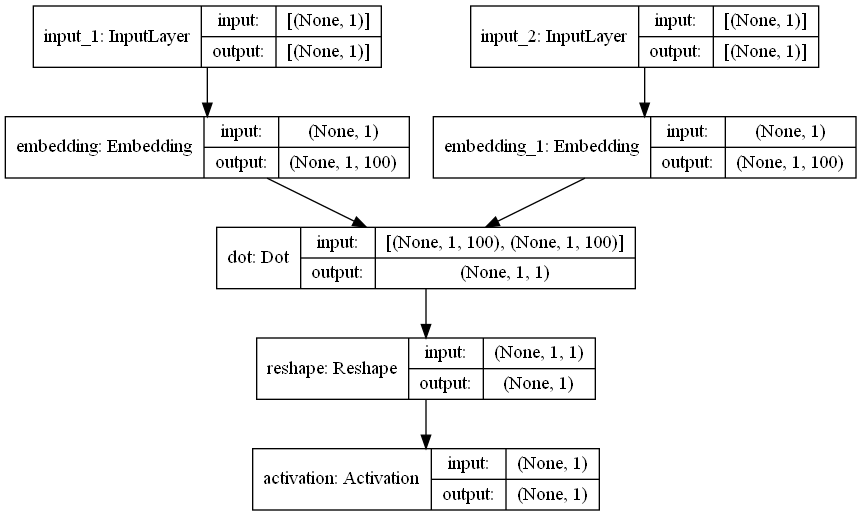

In [18]:
dot_product = Dot(axes=2)([word_embedding, context_embedding])
dot_product = Reshape((1,), input_shape=(1,1))(dot_product)
output = Activation('sigmoid')(dot_product)
model = Model(inputs=[w_inputs,c_inputs],outputs = output)
model.summary()
model.compile(loss='binary_crossentropy',optimizer='adam')
plot_model(model, to_file='model3.png',show_shapes=True,show_layer_names=True, rankdir='TB')

In [19]:
for epoch in range(1,6):
    loss = 0 
    for _,elem in enumerate(skip_grams):
        first_elem=np.array(list(zip(*elem[0]))[0], dtype='int32')
        second_elem=np.array(list(zip(*elem[0]))[1], dtype='int32')
        labels = np.array(elem[1],dtype='int32')
        X = [first_elem,second_elem]
        Y = labels
        loss += model.train_on_batch(X,Y)
    print('Epoch :',epoch, 'Loss :',loss)

Epoch : 1 Loss : 4631.549412164837
Epoch : 2 Loss : 3659.5779413469136
Epoch : 3 Loss : 3502.0026116166264
Epoch : 4 Loss : 3307.228163221851


KeyboardInterrupt: 

In [28]:
import gensim

f = open('vectors.txt' ,'w')
f.write('{} {}\n'.format(vocab_size-1, embedding_dim))
vectors = model.get_weights()[0]
for word, i in tokenizer.word_index.items():
    f.write('{} {}\n'.format(word, ' '.join(map(str, list(vectors[i, :])))))
f.close()

# 모델 로드
w2v = gensim.models.KeyedVectors.load_word2vec_format('./vectors.txt', binary=False)

In [29]:
w2v.most_similar(positive=['soldiers'])

[('inhabitants', 0.8655002117156982),
 ('attacking', 0.851689875125885),
 ('retreat', 0.8495177030563354),
 ('massacred', 0.8472638130187988),
 ('camps', 0.8426480293273926),
 ('democratic', 0.8411127924919128),
 ('shelling', 0.8402675986289978),
 ('baku', 0.839394211769104),
 ('forces', 0.8328711986541748),
 ('wounded', 0.8312819600105286)]

In [30]:
w2v.most_similar(positive=['doctor'])

[('migraine', 0.6579426527023315),
 ('bacteria', 0.6453806757926941),
 ('quack', 0.6419529914855957),
 ('slaves', 0.6395188570022583),
 ('medicine', 0.6283698081970215),
 ('patients', 0.6272274255752563),
 ('allergic', 0.6264219284057617),
 ('eating', 0.6125496625900269),
 ('doctors', 0.6124541759490967),
 ('jumped', 0.6121060848236084)]

In [31]:
w2v.most_similar(positive=['police'])

[('officers', 0.713651716709137),
 ('officer', 0.6867848634719849),
 ('arrested', 0.6440412998199463),
 ('corpses', 0.6267092823982239),
 ('endure', 0.6250627040863037),
 ('affairs', 0.617965042591095),
 ('scattered', 0.6179419755935669),
 ('enforcement', 0.6126166582107544),
 ('campaign', 0.6125957369804382),
 ('effectiveness', 0.611095130443573)]

In [32]:
w2v.most_similar(positive=['knife'])

[('wounds', 0.7916538119316101),
 ('intervention', 0.7809906005859375),
 ('butcher', 0.7801089286804199),
 ('disobedience', 0.7759896516799927),
 ('obey', 0.7725356817245483),
 ('guilt', 0.7714220881462097),
 ('unity', 0.7689099907875061),
 ('mankind', 0.7655408382415771),
 ('questioned', 0.76456218957901),
 ('greeks', 0.764274001121521)]

In [33]:
w2v.most_similar(positive=['engine'])

[('tires', 0.5220974683761597),
 ('mustang', 0.507629930973053),
 ('tank', 0.5019224882125854),
 ('valve', 0.5012264847755432),
 ('ride', 0.4952107071876526),
 ('brakes', 0.49130508303642273),
 ('inline', 0.483345091342926),
 ('trunk', 0.4730124771595001),
 ('driven', 0.46831607818603516),
 ('brake', 0.4655587375164032)]